In [1]:
import sklearn
import pickle
import numpy as np 
from tslearn.datasets import UCR_UEA_datasets
import tslearn

/home/jacqueline/.local/share/virtualenvs/TSInterpret-x4eqnPOt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Parameters

In [2]:
dataset='BasicMotions'

In [3]:
tslearn.datasets.CachedDatasets().list_datasets()

['Trace']

# Load Data

In [4]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)

In [5]:
print(train_x.shape)
print(test_x.shape)

(40, 100, 6)
(40, 100, 6)


In [6]:
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
pickle.dump(enc1,open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder_tf.pkl','wb'))

train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

/home/jacqueline/.local/share/virtualenvs/TSInterpret-x4eqnPOt/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Load Model

In [7]:

import tensorflow as tf 
model = tf.keras.models.load_model(f'../../ClassificationModels/models/{dataset}/cnn/BasicMotionsbest_model.hdf5')

2023-08-08 14:04:53.476346: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-08 14:04:54.516721: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
label_pred=np.argmax(model.predict(test_x),axis=1)
label_pred

2/2 [==============================] - 0s 3ms/step


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Explanation Algo

In [9]:
item=test_x[0].reshape(1,test_x.shape[1],test_x.shape[2])
shape=item.shape
y_target= model.predict(item)

1/1 [==============================] - 0s 24ms/step


In [10]:
y_target

array([[2.8015620e-05, 1.2882984e-03, 9.9654043e-01, 6.2079956e-03]],
      dtype=float32)

In [11]:
from TSInterpret.InterpretabilityModels.counterfactual.COMTECF import COMTECF

exp_model= COMTECF(model,(train_x,train_y),mode='time', backend='TF', method= 'opt')


In [12]:
exp = exp_model.explain(item)

1/1 [==============================] - 0s 25ms/step


In [13]:
array, label=exp

(1, 100, 6)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(6, 100)
(6, 100)


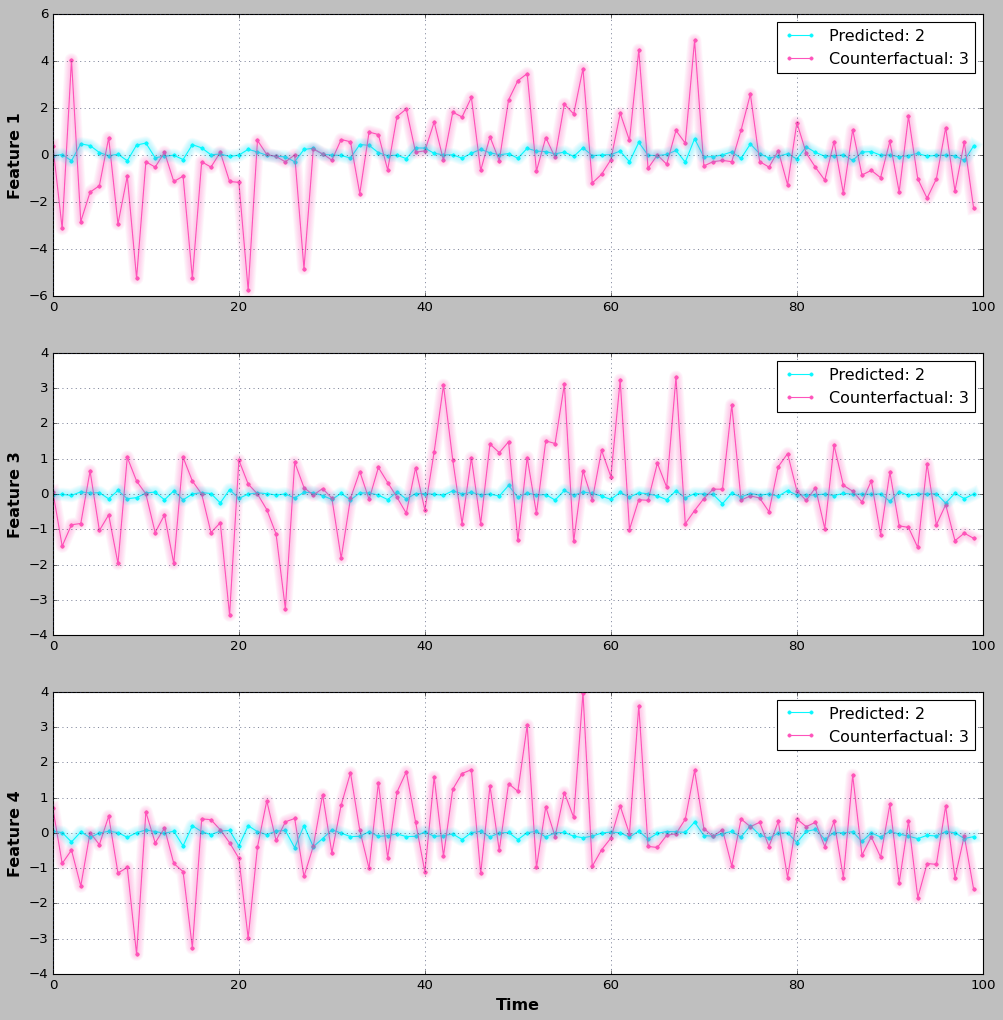

In [16]:
%matplotlib inline
org_label=np.argmax(y_target)
cf_label=label[0]
exp=array
print(exp.shape)
exp_model.plot_in_one(np.array(item[0]),org_label,np.array(exp[0]),cf_label)